# rotate_error_ellipse
誤差楕円の回転がなぜ、共分散行列の両側から回転行列をかけているのかよくわからない。  
なので実際に回してみるコードを書いてみた。  

In [11]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [12]:
class Error_ellipse:
    def __init__(self, sigma_x = 1.0, sigma_y = 1.0, cov_xy = 0.0, mu_x = 0.0, mu_y = 0.0):
        self.cov = np.array([[sigma_x, cov_xy], [cov_xy, sigma_y]])    # 分散共分散行列
        self.mean = np.array([mu_x, mu_y]).T                           # 平均値(楕円の中央)
        
    def shift(self, delta, angle):
        ca = math.cos(angle)
        sa = math.sin(angle)
        self.rot = np.array([[ca, sa],[-sa, ca]])    # 回転行列
        
        self.cov = self.rot.dot(self.cov).dot(self.rot.T)    # 回転
        self.mean = self.mean + delta                        # 移動
        
    def draw(self):
        eigen = np.linalg.eig(self.cov)    # eigenvalue
        
        v1 = eigen[0][0] * eigen[1][0]     # eigenvector
        v2 = eigen[0][1] * eigen[1][1]
        v1_direction = math.atan2(v1[1], v1[0])
        
        ellipse = Ellipse(self.mean, width=np.linalg.norm(v1), height=np.linalg.norm(v2), angle=v1_direction / 3.14 * 180)
        ellipse.set_alpha(0.2)
        
        fig = plt.figure(0)
        sp = fig.add_subplot(111, aspect='equal')
        sp.add_artist(ellipse)
        sp.set_xlim(-2.0, 2.0)
        sp.set_ylim(-2.0, 2.0)
        
        plt.show()

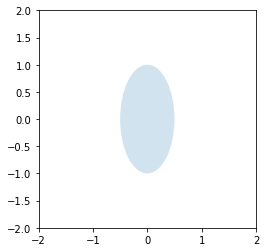

In [13]:
p = Error_ellipse(1.0, 2.0, 0.0)
p.draw()

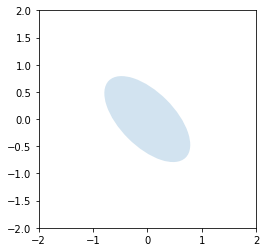

In [14]:
p.shift([0.0, 0.0], math.pi / 4)  # 45度回転
p.draw()

共分散行列を回転させる部分を以下に抜き出してみた。  

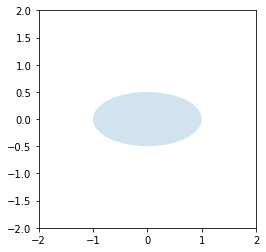

In [15]:
p.cov = p.rot.dot(p.cov).dot(p.rot.T)
p.draw()

試しに左側だけ掛けてみる。  
虚数解が出たらしい。傾き22.5度の直線を軸に90度回転しているっぽい。  
つまり右上が奥で左下が手前に向いている状況。  

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


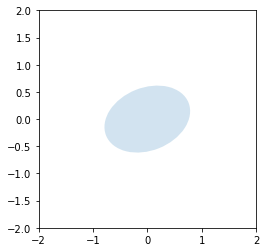

In [16]:
p.cov = p.rot.dot(p.cov)
p.draw()

当たり前だけど右側も掛けたらちゃんと回転した。  

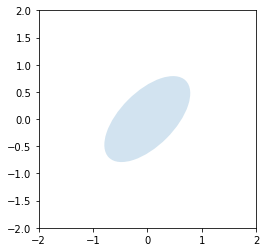

In [17]:
p.cov = p.cov.dot(p.rot.T)
p.draw()

転置した回転行列を左右入れ替えると逆回転した。  
回転行列を転置することと、回転角を逆にするのは同じなので当然。  

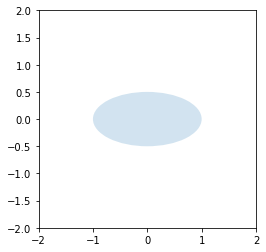

In [18]:
p.cov = p.rot.T.dot(p.cov).dot(p.rot)
p.draw()